In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_excel('/Users/mt/Desktop/python/shopify_challenge/shopify.xlsx')
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746,224,2.0,cash,2017-03-13 12:36:56
1,2.0,92.0,925,90,1.0,cash,2017-03-03 17:38:52
2,3.0,44.0,861,144,1.0,cash,2017-03-14 04:23:56
3,4.0,18.0,935,156,1.0,credit_card,2017-03-26 12:43:37
4,5.0,18.0,883,156,1.0,credit_card,2017-03-01 04:35:11


In [97]:
data.dtypes

order_id                 float64
shop_id                  float64
user_id                   object
order_amount               int64
total_items              float64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [98]:
data.isna().sum() / data.shape[0]*100

order_id          0.019996
shop_id           0.019996
user_id           0.000000
order_amount      0.000000
total_items       0.019996
payment_method    0.019996
created_at        0.019996
dtype: float64

In [99]:
data[['total_items']].isna().sum()

total_items    1
dtype: int64

In [100]:
# data.order_amount
for i in data.order_amount:
    total_orders = +i 
total_orders   

15725640

In [101]:
#AOV = REVENUE / number of orders
AOV = total_orders / 5000
AOV

3145.128

In [102]:
data.describe()

,order_id,shop_id,order_amount,total_items
count,5000.000000,5000.000000,5.001000e+03,5000.00000
mean,2500.500000,50.078800,6.288998e+03,8.78720
std,1443.520003,29.006118,2.261269e+05,116.32032
min,1.000000,1.000000,9.000000e+01,1.00000
25%,1250.750000,24.000000,1.630000e+02,1.00000
50%,2500.500000,50.000000,2.840000e+02,2.00000
75%,3750.250000,75.000000,3.900000e+02,3.00000
max,5000.000000,100.000000,1.572564e+07,2000.00000


Text(0.5, 0, 'Total_items')

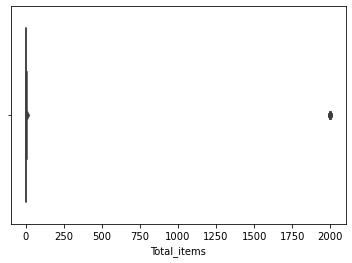

In [103]:
ax = sns.boxplot(x=data["total_items"])
ax.set_xlabel('Total_items')

Text(0.5, 0, 'Total_order_amount')

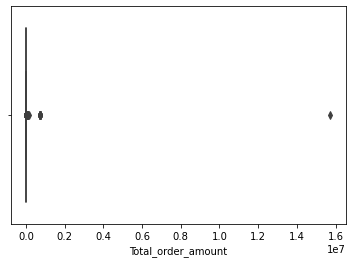

In [104]:
ax = sns.boxplot(x=data["order_amount"])
ax.set_xlabel('Total_order_amount')

In [105]:
data.loc[data['total_items'] >= 2000]


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16.0,42.0,607,704000,2000.0,credit_card,2017-03-07 04:00:00
60,61.0,42.0,607,704000,2000.0,credit_card,2017-03-04 04:00:00
520,521.0,42.0,607,704000,2000.0,credit_card,2017-03-02 04:00:00
1104,1105.0,42.0,607,704000,2000.0,credit_card,2017-03-24 04:00:00
1362,1363.0,42.0,607,704000,2000.0,credit_card,2017-03-15 04:00:00
1436,1437.0,42.0,607,704000,2000.0,credit_card,2017-03-11 04:00:00
1562,1563.0,42.0,607,704000,2000.0,credit_card,2017-03-19 04:00:00
1602,1603.0,42.0,607,704000,2000.0,credit_card,2017-03-17 04:00:00
2153,2154.0,42.0,607,704000,2000.0,credit_card,2017-03-12 04:00:00
2297,2298.0,42.0,607,704000,2000.0,credit_card,2017-03-07 04:00:00


We see that all of the recorded transactions of size 2000 occurred from the same user_id (607) of the same shop_id (42), and that the order_amount is exactly the same in each case (704000). Moreover, we see that there are some days where there are multiple identical transactions, and all purchases are made at exactly 4 a.m., to the second. 
Either there was a mistake in the dataset with duplicate entries, or this customer is automating the process of buying shoes in bulk

In [117]:
data.groupby('total_items').size()

total_items
1.0       1830
2.0       1832
3.0        941
4.0        293
5.0         77
6.0          9
8.0          1
2000.0      17
dtype: int64

All of the transaction sizes are 8 items or smaller, except for the 17 of size 2000. 
This can be the reason why our AOV is high.

In [126]:
data.groupby('total_items')['order_amount'].mean()

total_items
1.0          417.364481
2.0          750.215066
3.0         1191.076514
4.0          947.686007
5.0          759.350649
6.0        17940.000000
8.0         1064.000000
2000.0    704000.000000
Name: order_amount, dtype: float64

In [127]:
data.groupby('total_items')['order_amount'].max()

total_items
1.0        25725
2.0        51450
3.0        77175
4.0       102900
5.0         1760
6.0       154350
8.0         1064
2000.0    704000
Name: order_amount, dtype: int64

In [106]:
data[['order_amount','total_items']].mean()

order_amount    6288.9982
total_items        8.7872
dtype: float64

In [128]:
data[['order_amount','total_items']].median()

order_amount    284.0
total_items       2.0
dtype: float64

In [108]:
data[['order_amount','total_items']].mode()

,order_amount,total_items
0,153,2.0


In [109]:
data[['order_amount','total_items']].max()

order_amount    15725640.0
total_items         2000.0
dtype: float64

In [110]:
data[['order_amount','total_items']].min()

order_amount    90.0
total_items      1.0
dtype: float64